In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
%pylab inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


Reading data 

In [6]:
df = pd.read_csv("redditsurvey.csv") 

Now I'm going to clean and prepare my data for further process

In [7]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Entry Id
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


In [9]:
df.drop("Entry Id", axis=1, inplace=True)

In [10]:
df.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,32754,32754,32754,32754,32754,32754,32754,32754,20846,32754,28419,32752,32754,3,3,1,1,1,1
unique,3,8,7,7,3,3,8,440,52,9,1833,7,17,3,2,1,1,1,1
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,California,"Under $20,000",askreddit,I like dogs.,Other,7/13/11 15:47,public,I like cats.,Other,7/14/11 13:22,public
freq,26418,15802,10428,14814,30526,27488,11046,20967,3401,7892,2123,17149,6562,1,2,1,1,1,1


In [11]:
df.drop(["Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19"], axis=1, inplace=True)

In [12]:
df.columns

Index([u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [13]:
df.describe()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
count,32754,32754,32754,32754,32754,32754,32754,32754,20846,32754,28419,32752,32754
unique,3,8,7,7,3,3,8,440,52,9,1833,7,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,California,"Under $20,000",askreddit,I like dogs.,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,3401,7892,2123,17149,6562


In [14]:
# "Are you a dog or cat person?" column should only have two uniques
def clean_dog_cat_column(x):
    if x == "I like cats.":
        return "c"
    elif x == "I like dogs.":
        return "d"
    else:
        return "None"
    
df["Are you a dog or a cat person?"] = df["Are you a dog or a cat person?"].apply(clean_dog_cat_column)

In [15]:
df["Are you a dog or a cat person?"].describe()

count     32754
unique        3
top           d
freq      17149
Name: Are you a dog or a cat person?, dtype: object

In [16]:
# fix category names cause they are really annoyingly long...
df["gender"] = df["Please indicate your gender."]
df["age_bucket"] = df["Please select the category that includes your age."]
df["marital"] = df["What is your marital status?"]
df["employment"] = df["What best describes your employment status?"]
df["military"] = df["Are you or have you ever been in military service?"]
df["children"] = df["Do you currently have children under the age of 18 living in your household?"]
df["education"] = df["What best describes your level of education?"]
df["country_data"] = df["Treated country data"]
df["state"] = df["(For U. S. redditors) In which state do you live?"]
df["income_bucket"] = df["Which one of the following ranges includes your total yearly household income before taxes?"]
df["subreddit_data"] = df["treated subreddit data"]
df["dog_or_cat"] = df["Are you a dog or a cat person?"]
df["cheese"] = df["If you were a cheese, what cheese would you be?"]

df.drop(["Please indicate your gender.",
         "Please select the category that includes your age.",
         "What is your marital status?",
         "What best describes your employment status?",
         "Are you or have you ever been in military service?",
         "Do you currently have children under the age of 18 living in your household?",
         "What best describes your level of education?",
         "Treated country data",
         "(For U. S. redditors) In which state do you live?",
         "Which one of the following ranges includes your total yearly household income before taxes?",
         "treated subreddit data",
         "Are you a dog or a cat person?",
         "If you were a cheese, what cheese would you be?"], axis=1, inplace=True)

df.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'country_data', u'state', u'income_bucket',
       u'subreddit_data', u'dog_or_cat', u'cheese'],
      dtype='object')

In [17]:
df.describe()

,gender,age_bucket,marital,employment,military,children,education,country_data,state,income_bucket,subreddit_data,dog_or_cat,cheese
count,32754,32754,32754,32754,32754,32754,32754,32754,20846,32754,28419,32754,32754
unique,3,8,7,7,3,3,8,440,52,9,1833,3,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,California,"Under $20,000",askreddit,d,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,3401,7892,2123,17149,6562


In [18]:
# uniques in other categories
columns = ['gender', 'age_bucket', 'marital', 'employment', 'military', 'children', 'education', 'income_bucket', 'cheese']

for column in columns:
    print column, df[column].unique()

gender ['Male' 'Female' 'None']
age_bucket ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
marital ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
employment ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
military ['none' 'No' 'Yes']
children ['No' 'Yes' 'None']
education ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
income_bucket ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
cheese ['none' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' '1' ' awww' ' f7u12' "programming')"
 ' Pics']


In [19]:
# dropping US states
df.drop("state", axis=1, inplace=True)

Now I'm going to clean the data 

In [21]:
def clean_gender(x):
    if x == "Male":
        return "m"
    elif x == "Female":
        return "f"
    else:
        return "None"
    
df["gender"] = df["gender"].apply(clean_gender)

In [22]:
def clean_military(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return "None"
    
df["military"] = df["military"].apply(clean_military)

In [23]:
def clean_children(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return "None"
    
df["children"] = df["children"].apply(clean_children)

In [24]:
def clean_cheese(x):
    if x == "none":
        return "None"
    elif x == " awww":
        return "None"
    elif x == " f7u12":
         return "None"   
    elif x == "programming":
        return "None"
    elif x == "1":
        return "None"
    elif x == " Pics":
        return "None"
    else:
        return x
df["cheese"] = df["cheese"].apply(clean_cheese)

In [25]:
columns = ['gender', 'age_bucket', 'marital', 'employment', 'military', 'children', 'education', 'income_bucket', 'cheese']

for column in columns:
    print column, df[column].unique()

gender ['None']
age_bucket ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
marital ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
employment ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
military ['None' 0 1]
children [0 1 'None']
education ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
income_bucket ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
cheese ['None' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' "programming')"]


In [26]:
df.shape

(32754, 12)

In [27]:
df.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'country_data', u'income_bucket',
       u'subreddit_data', u'dog_or_cat', u'cheese'],
      dtype='object')

In [28]:
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].head()

""
0
1
2
3
4


In [29]:
def describe_categorical(df):
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))
    
describe_categorical(df)

,gender,age_bucket,marital,employment,military,children,education,country_data,income_bucket,subreddit_data,dog_or_cat,cheese
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,28419,32754,32754
unique,1,8,7,7,3,3,8,440,9,1833,3,13
top,None,18-24,Single,Employed full time,0,0,Bachelor's degree,United States,"Under $20,000",askreddit,d,Other
freq,32754,15802,10428,14814,30526,27488,11046,20967,7892,2123,17149,6562


In [30]:
X = df.copy()
X_no_country = X.copy()
X_no_country.drop("country_data", axis=1, inplace=True)

X_no_country_no_reddit = X_no_country.copy()
X_no_country_no_reddit.drop("subreddit_data", axis=1, inplace=True)
X_no_country_no_reddit.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'income_bucket', u'dog_or_cat', u'cheese'],
      dtype='object')

In [ ]:
categorical_variables = X.columns

for variable in categorical_variables:
    
    X[variable].fillna("Null", inplace=True)
    
    dummies = pd.get_dummies(X[variable], prefix=variable)
    
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [ ]:
X

In [ ]:
categorical_variables = X_no_country_no_reddit.columns

for variable in categorical_variables:
    
    X_no_country_no_reddit[variable].fillna("Null", inplace=True)
    
    dummies = pd.get_dummies(X_no_country_no_reddit[variable], prefix=variable)
    
    X_no_country_no_reddit = pd.concat([X_no_country_no_reddit, dummies], axis=1)
    X_no_country_no_reddit.drop([variable], axis=1, inplace=True)

In [ ]:
X_no_country_no_reddit

In [ ]:
X_for_eda = df.copy()
X_for_eda.drop(["country_data", "subreddit_data"], axis=1, inplace=True)
X_for_eda.columns

In [ ]:
columns = X_for_eda.columns

for column in columns:
    print column
    print df[column].value_counts()
    print

Visualizing

In [ ]:
columns = X_for_eda.columns

for column in columns:
    print column
    df[column].value_counts().plot(kind='pie')
    show()
    print
                       

### Analysis of Visualization

<ls> Many among the people are male
<ls> Most do not have children in their household
<ls> Many people got under 20k salary
<ls> There are more dog lovers than cat lovers
<ls> Many of the people are between 18years to 24 years and many among them did not serve milotary 
<ls> Very few are engaged or widowed

# Using Pearson's Correlation Coefficient

In [368]:
X2 = X_no_country_no_reddit.copy()
X2.describe()

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,...,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,0.006137,0.187305,0.806558,0.482445,0.353392,0.068908,0.015326,0.004274,0.001832,0.002687,...,0.091317,0.076815,0.010289,0.054039,0.000305,0.200342,0.018868,0.105453,0.098125,0.000031
std,0.078097,0.390162,0.395002,0.499699,0.478030,0.253301,0.122849,0.065239,0.042761,0.051764,...,0.288064,0.266302,0.100912,0.226098,0.017471,0.400262,0.136061,0.307141,0.297489,0.005525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [370]:
sns.set(style="white")

In [371]:
d = pd.DataFrame(data=X2,
                 columns=X2.columns)

In [372]:
# Compute the correlation matrix
corr = d.corr()
corr

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
gender_None,1.000000,-0.037724,-0.160452,-0.035184,0.002427,-0.001313,-0.003439,-0.005148,0.014919,0.381091,...,0.003590,-0.009454,-0.004138,0.033091,-0.001373,-0.000262,0.000596,-0.011705,0.000364,-0.000434
gender_f,-0.037724,1.000000,-0.980288,0.047638,-0.032750,-0.027108,0.009537,0.010528,0.017864,-0.008289,...,0.047477,0.083378,-0.023358,-0.010913,0.009527,-0.043812,0.017970,-0.022154,-0.038142,-0.002653
gender_m,-0.160452,-0.980288,1.000000,-0.040098,0.031868,0.027036,-0.008741,-0.009381,-0.020595,-0.067160,...,-0.047605,-0.080487,0.023890,0.004236,-0.009139,0.043327,-0.017868,0.024197,0.037602,0.002706
age_bucket_18-24,-0.035184,0.047638,-0.040098,1.000000,-0.713762,-0.262653,-0.120453,-0.063257,-0.041361,-0.050112,...,0.004880,-0.025429,-0.014279,-0.001602,-0.002883,-0.012640,-0.020725,0.000922,0.024322,-0.005335
age_bucket_25-34,0.002427,-0.032750,0.031868,-0.713762,1.000000,-0.201115,-0.092232,-0.048436,-0.031670,-0.038371,...,0.011309,0.031627,-0.000059,-0.004662,0.005360,0.000326,0.032204,0.012349,-0.031518,0.007474
age_bucket_35-44,-0.001313,-0.027108,0.027036,-0.262653,-0.201115,1.000000,-0.033940,-0.017824,-0.011654,-0.014120,...,-0.008830,0.015674,0.003318,-0.012777,0.002145,0.021630,-0.001404,-0.017270,-0.009914,-0.001503
age_bucket_45-54,-0.003439,0.009537,-0.008741,-0.120453,-0.092232,-0.033940,1.000000,-0.008174,-0.005345,-0.006475,...,-0.009353,-0.002390,0.006982,-0.005636,-0.002180,0.005854,-0.008168,-0.006423,0.013986,-0.000689
age_bucket_55-64,-0.005148,0.010528,-0.009381,-0.063257,-0.048436,-0.017824,-0.008174,1.000000,-0.002807,-0.003401,...,-0.002899,0.003947,0.011870,-0.005310,-0.001145,0.001113,-0.009086,-0.002687,-0.002733,-0.000362
age_bucket_65 or Above,0.014919,0.017864,-0.020595,-0.041361,-0.031670,-0.011654,-0.005345,-0.002807,1.000000,-0.002223,...,-0.001187,0.009092,0.009783,0.002393,-0.000749,-0.000037,-0.005941,-0.005410,0.002670,-0.000237
age_bucket_None,0.381091,-0.008289,-0.067160,-0.050112,-0.038371,-0.014120,-0.006475,-0.003401,-0.002223,1.000000,...,0.001974,-0.010542,0.000553,0.063246,-0.000907,-0.008296,-0.002863,-0.008219,-0.007207,-0.000287


In [373]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

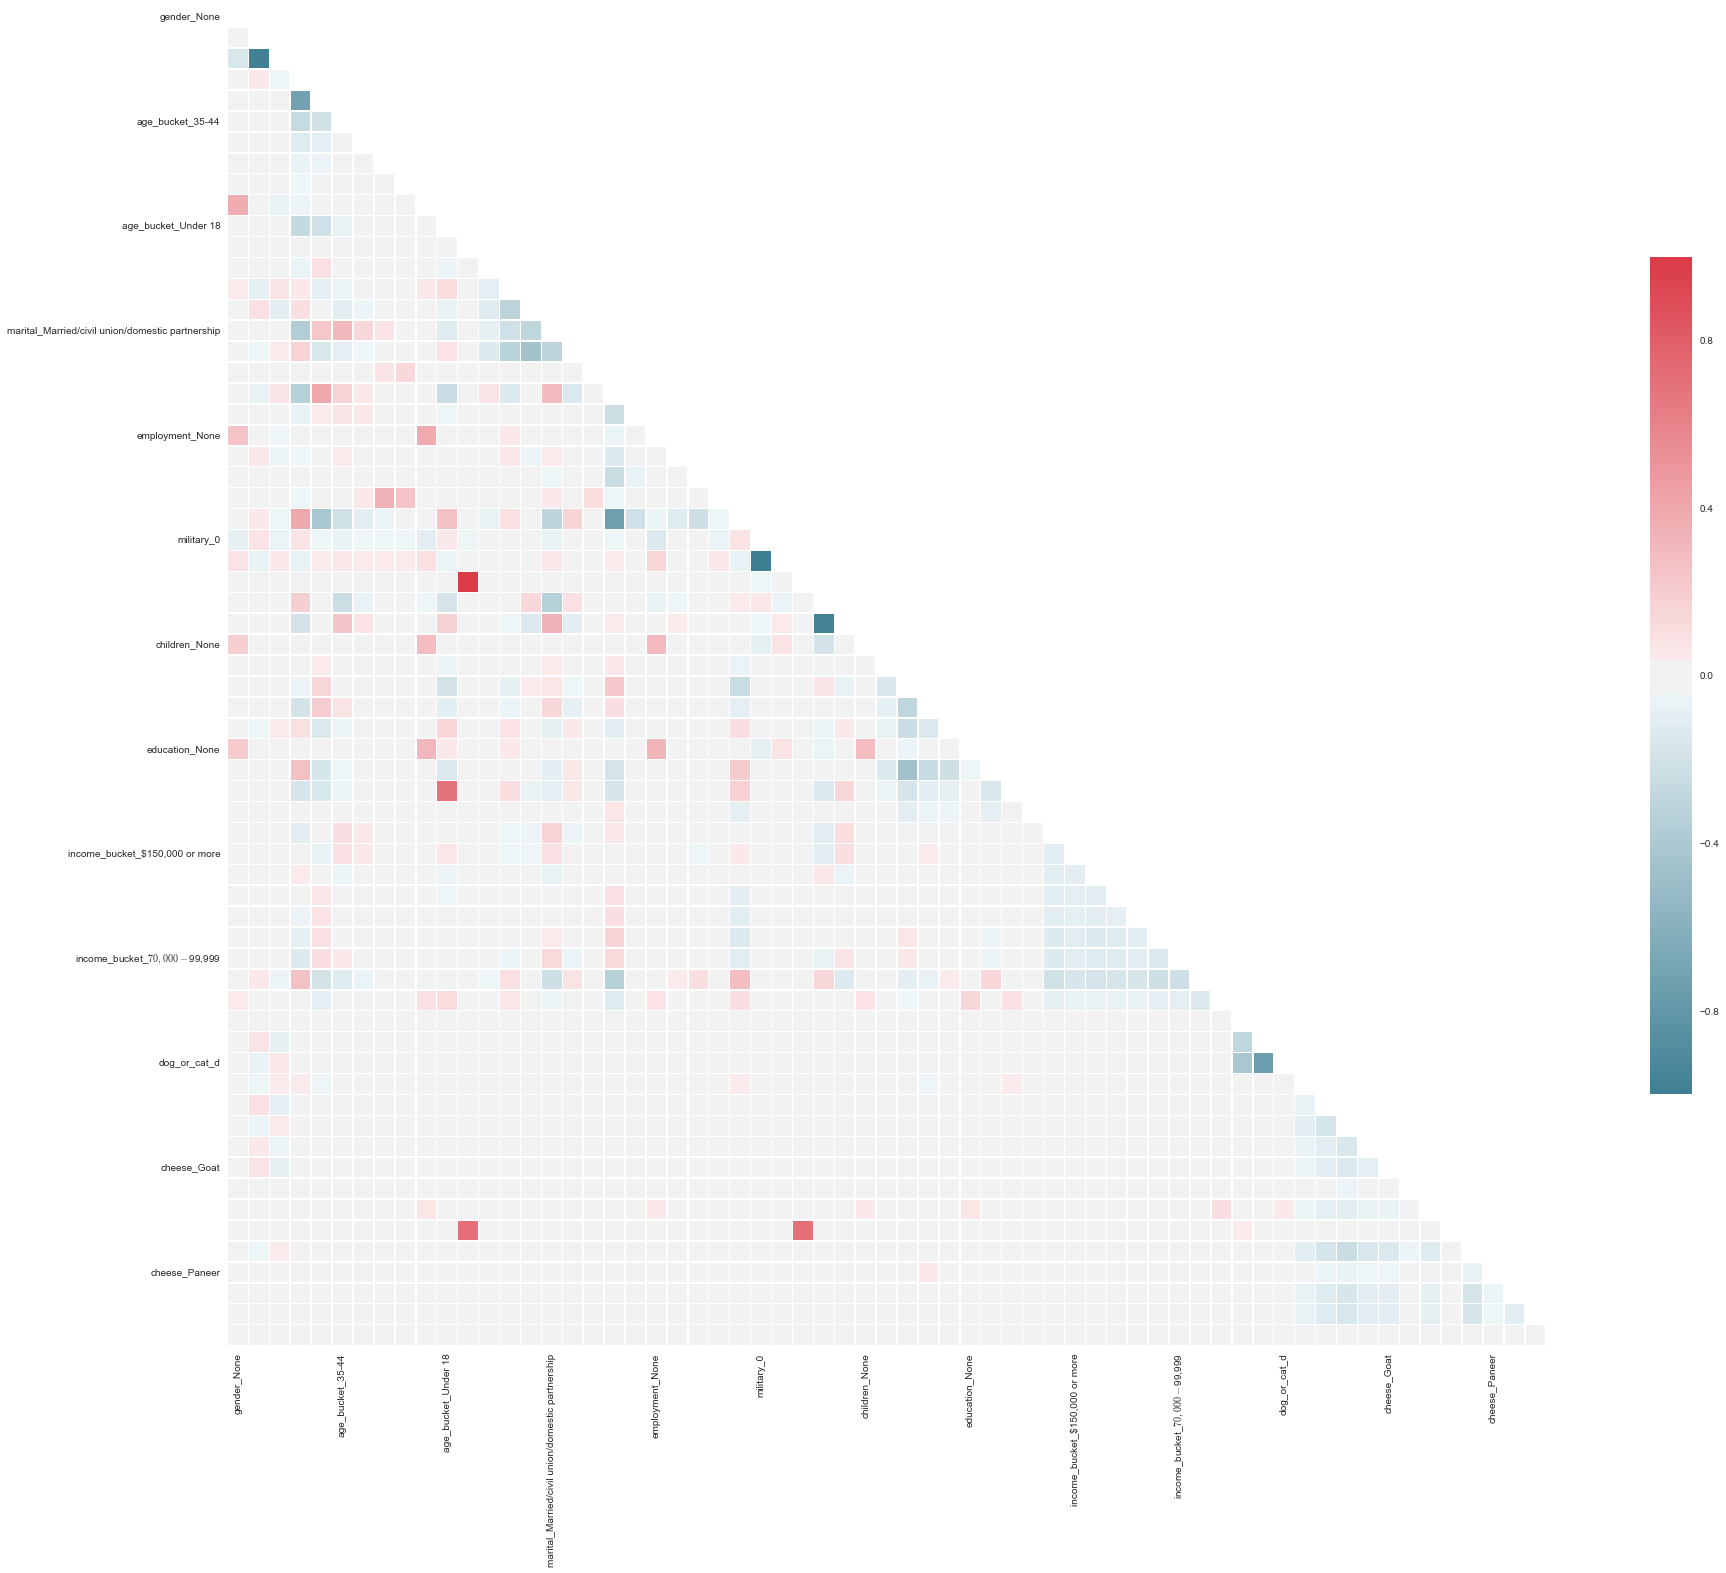

In [377]:

f, ax = plt.subplots(figsize=(30, 30))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [380]:
corr.stack().sort_values()

military_0                                        military_1                                         -0.998795
military_1                                        military_0                                         -0.998795
gender_f                                          gender_m                                           -0.980288
gender_m                                          gender_f                                           -0.980288
children_1                                        children_0                                         -0.975109
children_0                                        children_1                                         -0.975109
dog_or_cat_c                                      dog_or_cat_d                                       -0.753211
dog_or_cat_d                                      dog_or_cat_c                                       -0.753211
employment_Student                                employment_Employed full time                      -0.736561
e

In [384]:
# cut out the noise by zero-ing out the diagonal (https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.tril.html)
corr.loc[:,:] = np.tril(corr, -1)
corr.stack().sort_values()

military_1                                        military_0                                         -0.998795
gender_m                                          gender_f                                           -0.980288
children_1                                        children_0                                         -0.975109
dog_or_cat_d                                      dog_or_cat_c                                       -0.753211
employment_Student                                employment_Employed full time                      -0.736561
age_bucket_25-34                                  age_bucket_18-24                                   -0.713762
education_Some college                            education_Bachelor's degree                        -0.459320
marital_Single                                    marital_In a relationship                          -0.447470
employment_Student                                age_bucket_25-34                                   -0.415915
d

# Forest Model

In [500]:

X_for_forest = df.copy()
X_for_forest.drop(["country_data", "subreddit_data"], axis=1, inplace=True)
X_for_forest.columns

Index([u'gender', u'age_bucket', u'marital', u'employment', u'military',
       u'children', u'education', u'income_bucket', u'dog_or_cat', u'cheese'],
      dtype='object')

In [501]:
categorical_variables = X_for_forest.columns

for variable in categorical_variables:
    
    X_for_forest[variable].fillna("None", inplace=True)
    
    dummies = pd.get_dummies(X_for_forest[variable], prefix=variable)
    
    X_for_forest = pd.concat([X_for_forest, dummies], axis=1)
    X_for_forest.drop([variable], axis=1, inplace=True)

In [502]:
X_for_forest.drop(["military_1","military_None"], axis=1, inplace=True)
y = X_for_forest.pop("military_0")

In [503]:

def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
printall(X_for_forest)

,gender_None,gender_f,gender_m,age_bucket_18-24,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65 or Above,age_bucket_None,age_bucket_Under 18,marital_Blank,marital_Engaged,marital_Forever Alone,marital_In a relationship,marital_Married/civil union/domestic partnership,marital_Single,marital_Widowed,employment_Employed full time,employment_Freelance,employment_None,employment_Not employed and not looking for work,"employment_Not employed, but looking for work",employment_Retired,employment_Student,children_0,children_1,children_None,education_Associate degree,education_Bachelor's degree,education_Graduate or professional degree,education_High school graduate or equivalent,education_None,education_Some college,education_Some high school,education_Trade or Vocational degree,"income_bucket_$100,000 - $149,999","income_bucket_$150,000 or more","income_bucket_$20,000 - $29,999","income_bucket_$30,000 - $39,999","income_bucket_$40,000 - $49,999","income_bucket_$50,000 - $69,999","income_bucket_$70,000 - $99,999","income_bucket_Under $20,000",income_bucket_none,dog_or_cat_None,dog_or_cat_c,dog_or_cat_d,cheese_American,cheese_Brie,cheese_Cheddar,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32750,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32751,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32752,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [504]:
X_for_forest.columns

Index([u'gender_None', u'gender_f', u'gender_m', u'age_bucket_18-24',
       u'age_bucket_25-34', u'age_bucket_35-44', u'age_bucket_45-54',
       u'age_bucket_55-64', u'age_bucket_65 or Above', u'age_bucket_None',
       u'age_bucket_Under 18', u'marital_Blank', u'marital_Engaged',
       u'marital_Forever Alone', u'marital_In a relationship',
       u'marital_Married/civil union/domestic partnership', u'marital_Single',
       u'marital_Widowed', u'employment_Employed full time',
       u'employment_Freelance', u'employment_None',
       u'employment_Not employed and not looking for work',
       u'employment_Not employed, but looking for work', u'employment_Retired',
       u'employment_Student', u'children_0', u'children_1', u'children_None',
       u'education_Associate degree', u'education_Bachelor's degree',
       u'education_Graduate or professional degree',
       u'education_High school graduate or equivalent', u'education_None',
       u'education_Some college', u'education

In [505]:
y

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       0
24       1
25       1
26       1
27       1
28       1
29       1
        ..
32724    1
32725    1
32726    1
32727    1
32728    1
32729    1
32730    1
32731    1
32732    1
32733    1
32734    0
32735    1
32736    0
32737    0
32738    1
32739    1
32740    1
32741    0
32742    1
32743    1
32744    1
32745    1
32746    1
32747    1
32748    0
32749    1
32750    1
32751    1
32752    1
32753    1
Name: military_0, dtype: float64

In [506]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_for_forest, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.617431393799


In [507]:
model.feature_importances_

array([ 0.00290236,  0.00792052,  0.00463907,  0.0073184 ,  0.01024547,
        0.00801184,  0.00531414,  0.00318682,  0.00235594,  0.00142634,
        0.00522928,  0.00222697,  0.01279885,  0.03089532,  0.03687507,
        0.02176756,  0.03712806,  0.00316124,  0.02577257,  0.01689379,
        0.02918423,  0.00851825,  0.0140621 ,  0.00482639,  0.01865822,
        0.01938579,  0.01996479,  0.00925339,  0.01266951,  0.01816975,
        0.01866229,  0.02089757,  0.00217978,  0.02826904,  0.00783745,
        0.00874395,  0.02446803,  0.01930037,  0.02170727,  0.0204242 ,
        0.02148924,  0.02740129,  0.0259113 ,  0.0251935 ,  0.01226643,
        0.03045692,  0.03762554,  0.04370327,  0.01220901,  0.02237626,
        0.02968205,  0.01959056,  0.01698057,  0.0038395 ,  0.01490313,
        0.00069449,  0.0317079 ,  0.00394842,  0.02374053,  0.02302813,  0.        ])

/Users/junting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


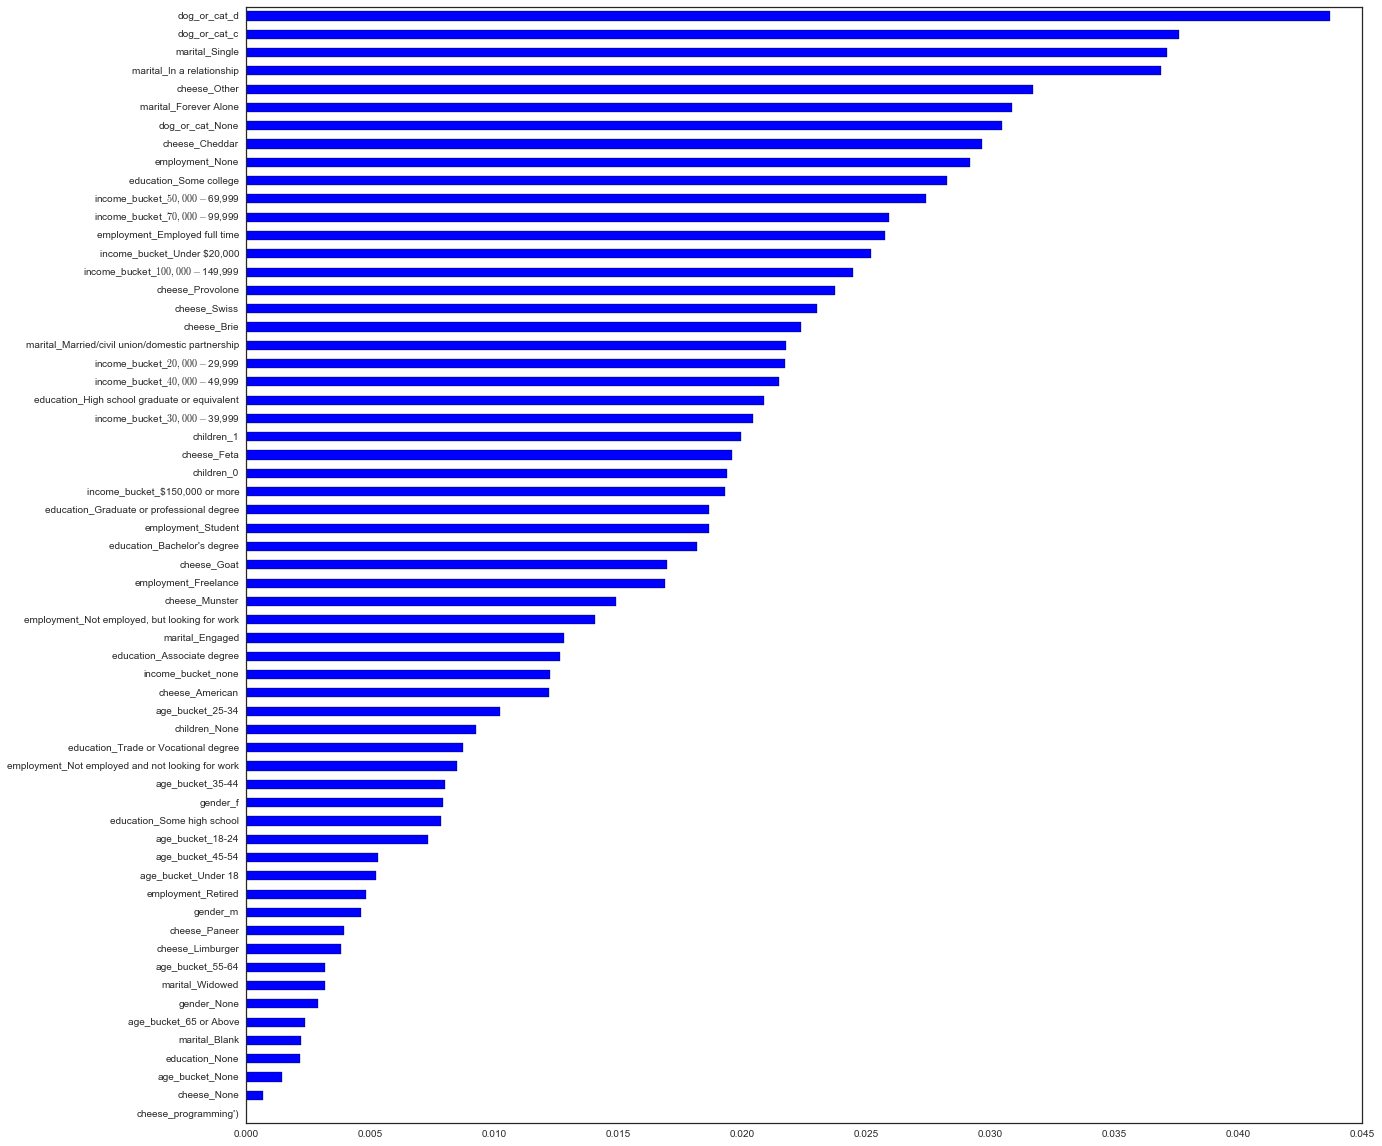

In [508]:
feature_importances = pd.Series(model.feature_importances_, index=X_for_forest.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,20));

30 trees
C-stat:  0.596680680777

50 trees
C-stat:  0.608086136008

100 trees
C-stat:  0.617431393799

200 trees
C-stat:  0.624003770339

500 trees
C-stat:  0.627449893789

1000 trees
C-stat:  0.626531782778

2000 trees
C-stat:  0.627346206095



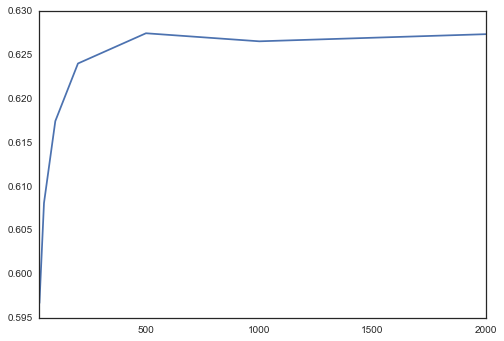

In [511]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_for_forest, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.626531782778

None option
C-stat:  0.626531782778

sqrt option
C-stat:  0.625633491819

log2 option
C-stat:  0.622404418531

0.9 option
C-stat:  0.625248772539

0.2 option
C-stat:  0.625446737813



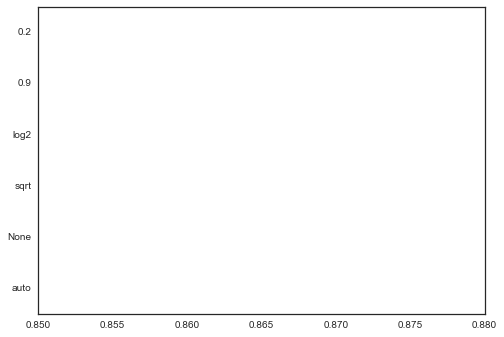

In [512]:
results2 = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_for_forest, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results2.append(roc)
    print ""
    
pd.Series(results2, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.626531782778

2 min samples
C-stat:  0.635851324491

3 min samples
C-stat:  0.644284624603

4 min samples
C-stat:  0.650785881265

5 min samples
C-stat:  0.656054802622

6 min samples
C-stat:  0.660084206112

7 min samples
C-stat:  0.663254017736

8 min samples
C-stat:  0.665734038594

9 min samples
C-stat:  0.667797411948

10 min samples
C-stat:  0.66978461484



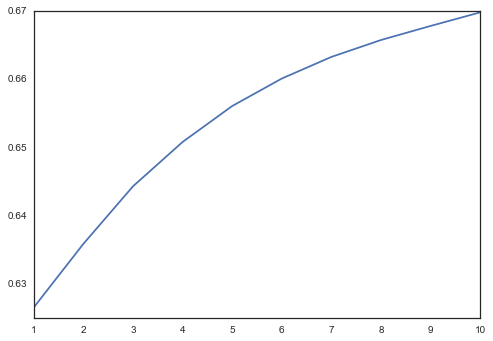

In [513]:
results3 = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X_for_forest, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results3.append(roc)
    print ""
    
pd.Series(results3, min_samples_leaf_options).plot();